#**Project 2: Disaster or not? Tweet classification**

###Team google: 
Florian Emery - Ibrahim Ounon - Pau Gallardo - Sarah Büchner 

[Github Repository Team Google](https://github.com/SarahBuechner/BigScale_Disaster_true_or_not)

### Project Video

In [2]:
%%HTML
<iframe width="821" height="462" src="https://www.youtube.com/embed/tdJWsxcjBZs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# 0. Project description
Real or Not? NLP with Disaster Tweets: In this project you are challenged to build a Machine
Learning model that can predict which tweets are about a real disaster and which are not. The
project topic is based around a Kaggle competition. You can find the link to the competition here.
You will find more information about the project and the dataset in the competition page.

In this project, you will have the chance to compare your prediction results with your fellows (and
also other Kaggle users). Make an account in Kaggle (if you don’t have already) and join the
competition. As soon as you make a submission you can see the prediction accuracy and your
ranking in the leaderboard. Note that you can only make 5 submissions per day. To know more
about the competition rules, check the competition page in Kaggle.

**Table of contents**
0. Project description

1. Packages and libraries installation

2. Database

  2.1 Data Exploration

3. Exploratory data analysis
  
  3.1 Distribution real and non-real tweets

  3.2 Distribution tweet length

  3.3 Understanding location

  3.3.2 Distribution location 

  3.3.3 Distribution location for not real disaster

  3.3.4 Distribution location for real disaster

  3.4 Possible patterns between Real and Not Real tweets

  3.4.1 Understanding tweet's patterns by location
  
  3.5 Distribution keyword (real disaster and not)

  3.6 Word Frequency analysis

  3.6.1 Wordcloud representation

  3.6.2 Frequency of words (ngrams)

  3.7 Keywords distribution graph

4. Data cleaning

  4.1 Working with abbreviations

  4.2 Studying the 305 duplicates

  4.3 Master data preprocessing function

5. Machine Learning

  5.1 Logistic Regression Classifier

  5.2 K Neighbors Classifier

  5.3 Decision Tree Classifier

  5.4 Random Forest Classifier


# 1. Packages and libraries installation

In [0]:
# EDA and data processing
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import io
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from collections import defaultdict
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Machine Learning
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.draw import manual_legend
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Database

In [0]:
# The dataset 
train = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/BigScale_Disaster_true_or_not/master/data/train.csv", encoding="utf-8")
test = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/BigScale_Disaster_true_or_not/master/data/test.csv", encoding="utf-8")

## 2.1 Data Exploration

Before starting, let's analyze the different types of data contained in our `train` dataset (notice that you find the same in the `test` dataset) 

**Findings**: We can see that the set of the elements are objects apart from the identifiers which are of the integer type.

In [0]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

**Different possible location**

In [0]:
n = 20 # Select total number of unique locations you want to display
locations = train["location"].unique()
for location in locations[0:n]:
  print(location)

nan
Birmingham
Est. September 2012 - Bristol
AFRICA
Philadelphia, PA
London, UK
Pretoria
World Wide!!
Paranaque City
Live On Webcam
milky way
GREENSBORO,NORTH CAROLINA
England.
Sheffield Township, Ohio
India
Barbados
Anaheim
Abuja
USA
South Africa


**Display of the elements that do not constitute a real disaster (target = 0).**

In [0]:
target_0 = train[(train['target'] == 0)]  
print(target_0.head(10))

    id keyword location                          text  target
15  23     NaN      NaN                What's up man?       0
16  24     NaN      NaN                 I love fruits       0
17  25     NaN      NaN              Summer is lovely       0
18  26     NaN      NaN             My car is so fast       0
19  28     NaN      NaN  What a goooooooaaaaaal!!!!!!       0
20  31     NaN      NaN        this is ridiculous....       0
21  32     NaN      NaN             London is cool ;)       0
22  33     NaN      NaN                   Love skiing       0
23  34     NaN      NaN         What a wonderful day!       0
24  36     NaN      NaN                      LOOOOOOL       0


**Display of the elements that are real and therefore the target at 1**

In [0]:
target_1 = train[(train['target'] == 1)]
print(target_1.head(10))

   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
5   8     NaN  ...  #RockyFire Update => California Hwy. 20 closed...      1
6  10     NaN  ...  #flood #disaster Heavy rain causes flash flood...      1
7  13     NaN  ...  I'm on top of the hill and I can see a fire in...      1
8  14     NaN  ...  There's an emergency evacuation happening now ...      1
9  15     NaN  ...  I'm afraid that the tornado is coming to our a...      1

[10 rows x 5 columns]


# 3. Exploratory data analysis
## 3.1 Distribution real and non-real tweets

Display of the distribution between the real and non-real tweets. 

**Findings:** We can see that there are a bit more non-real cases but the sample is quite balanced, so there is no need to up-sampled the minority class.

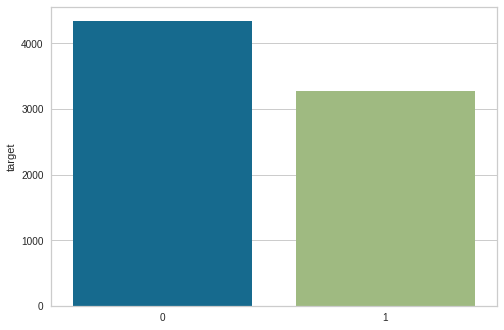

In [0]:
a = train.target.value_counts()
sns.barplot(a.index,a)

## 3.2 Distribution tweet length
In order to get a better idea of the elements that differentiate the tweets from a disaster and those that are not, we will analyze the structure of each tweet. For example, here we can see the distribution of the number of words in each case. There is no significant difference between the two cases.

**Findings:** There is no difference based on the total number of words contained in a tweet from real and not real disaster. 

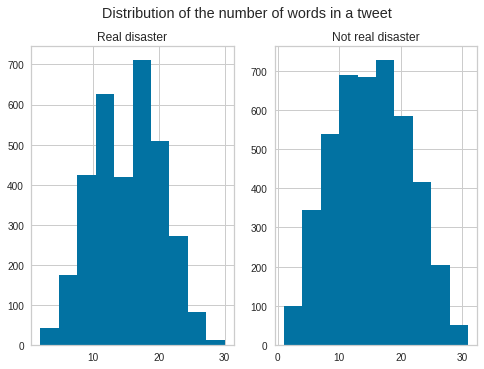

In [0]:
fig,(axR,axN)=plt.subplots(1,2)
train_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
axR.hist(train_len)
axR.set_title('Real disaster')

train_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
axN.hist(train_len)
axN.set_title('Not real disaster')

fig.suptitle('Distribution of the number of words in a tweet')
plt.show()

## 3.3 Understanding location
### 3.3.1 Distribution location (not real disaster)

**Display** of the different locations with the corresponding number of tweets for **No real disaster**

In [0]:
target_0['location'].value_counts().head(n=20)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
United Kingdom     10
California         10
NYC                10
Australia           9
Chicago, IL         9
London, England     9
304                 9
ss                  9
San Francisco       8
New York, NY        8
Name: location, dtype: int64

### 3.3.2 Distribution location

In [0]:
"""
Function traceBarplot which trace barplot 
Parameters:
  n: number of locations you want to display
  title: title of your barplot
"""  

def traceBarplot(n, title):
  location_count  = train['location'].value_counts()[:n,]
  plt.figure(figsize=(10,5))

  sns.barplot(location_count.index, location_count.values,palette="ch:.25", alpha=0.8)
  plt.title('Tweet release top ' + str(n) + ' locations')
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xlabel('Location', fontsize=12)
  plt.xticks(rotation=45)
  plt.show()

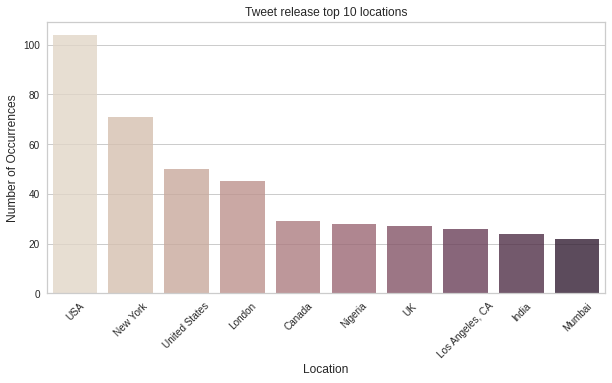

In [0]:
# Tweet location for real and not real disasters
n = 10 
title = 'Tweet release top ' + str(n) + ' locations'
traceBarplot(n,title)

### 3.3.3 Distribution location for not real disasters

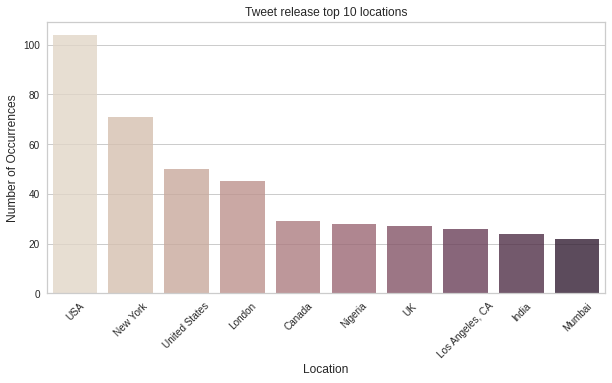

In [0]:
# Tweet location for not real disasters
n = 10 
title = 'Tweet release top ' + str(n) + ' locations for not real disasters'
traceBarplot(n,title)

### 3.3.4 Distribution location for real disasters

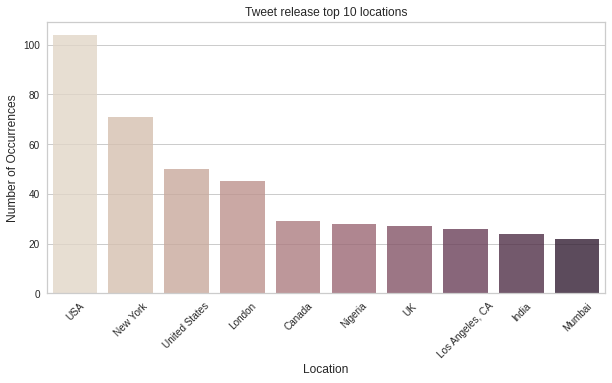

In [0]:
# Tweet location for real disasters
n = 10 # select total number of locations you want to display
title = 'Tweet release top ' + str(n) + ' locations for real disasters'
traceBarplot(n,title)

**Findings**: It seems that location does not affect whether the tweet was about a real disaster or not

## 3.4 Possible patterns between Real and Not Real tweets
### 3.4.1 Understanding tweet's patterns by location
Once we saw that location seems not to be relevant to classify the tweet what we are now wondering if tweets 
from a given location follow any write common patern

**Findings**:
- If the tweet is repeated more than once it's more probably to be a tweet for a not real disaster ?
- In general, tweets of not real disasters tends have more grammar errors as well as invented words rather than those about real disasters.

In [0]:
# Tweets of not real disasters in USA
n = 10 # specify here how many tweets you want to display
location = "USA" # specify here how many tweets you want to display

train_0_USA = train[(train['location'] == location) & (train['target'] == 0)]
for tweet in train_0_USA["text"][0:n]:
  print(tweet)

One thing for sure-God has promised Israel will not be annihilated. But...the horror of Iran w/nukes. https://t.co/xn09Mx6sxy
YOUR PHONE IS SPYING ON YOU! Hidden Back Door NSA Data Mining Software | THE FINANCIAL ARMAGEDDON BLOG http://t.co/qyCw5JJaj1
Black Eye 9: A space battle occurred at Star O784 involving 2 fleets totaling 4103 ships with 50 destroyed
City program to help turn blight into greenspace: The Tennessee Housing DevelopmentÛ_ http://t.co/ZZcbBQyJ1q  #news http://t.co/KKSgHsblFH
@troylercraft YEAH ITS NOT WORTH IT BC HE ALREADY HAS SO MANY SPAMMERS &amp; HIS TWITTER IS PROBABLY BLOWN UP EVERY SECOND
@sholt87 @MtGrotto @Eco11C @carlsbadbugkil1 Saved us?Bush lowered tax rate for wealthy n economy collapsed w/Middle Class 401ks destroyed.
Petition | Heartless owner that whipped horse until it collapsed is told he can KEEP his animal! Act Now! http://t.co/nJRjxqBjr4
When high fashion and food collide: Gucci has chosen one of ShanghaiÛªs most popular commercial avenue... htt

In [0]:
# Tweets of real disasters in USA
train_1_USA = train[(train['location'] == location) & (train['target'] == 1)]
for tweet in train_1_USA["text"][0:n]:
  print(tweet)

#Kurds trampling on Turkmen flag later set it ablaze while others vandalized offices of Turkmen Front in #Diyala http://t.co/4IzFdYC3cg
Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/TH9YwBbeet #worldNews
Thousands attend a rally organized by Peace Now protesting the arson attack that took the life of an http://t.co/bvCKd9pdTi
Palestinian Teen Killed Amid Protests Against Arson Attack http://t.co/okVsImoGic
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/a6wmbnR51S
Black Eye 9: A space battle occurred at Star M27329 involving 1 fleets totaling 1236 ships with 7 destroyed
#News FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps (say what?): åÊFedEx no... http://t.co/K0Y7xFxmXA #TCOT
'American Weapons and Support Are Fueling a Bloody Air War in Yemen' http://t.co/7aGeAkVn2x
Another day has passed and THANKFULLY Central Command has CONFIRMED NO new casualties. Please pray

## 3.5 Distribution keyword (real disaster and not)
**Display of the keywords for Real disaster**

In [0]:
target_1['keyword'].value_counts().head(n=20)

outbreak               39
wreckage               39
derailment             39
oil%20spill            37
typhoon                37
debris                 37
suicide%20bombing      32
evacuated              32
suicide%20bomb         32
rescuers               32
razed                  31
nuclear%20disaster     31
earthquake             30
airplane%20accident    30
suicide%20bomber       30
wildfire               29
bridge%20collapse      29
collision              29
mass%20murder          28
casualties             28
Name: keyword, dtype: int64

**Display the keywords for No Real disaster**

In [0]:
target_0['keyword'].value_counts().head(n=20)

body%20bags    40
armageddon     37
harm           37
ruin           36
wrecked        36
deluge         36
twister        35
siren          35
explode        35
fear           35
screaming      34
aftershock     34
panic          34
crush          33
blazing        33
sinking        33
blaze          33
blizzard       33
traumatised    33
body%20bag     32
Name: keyword, dtype: int64

## 3.6 Word Frequency analysis
### 3.6.1 Wordcloud representation
**Worldcloud of disaster**

In [0]:
"""
Function worcloud which draw barplot 
Parameters:
  target: target that you want to draw if disaster or not
"""  
def wordcloud(target):
  dis_words = ' '.join(target)
  dis_wc = WordCloud(width = 512,height = 512).generate(dis_words)
  plt.imshow(dis_wc)
  plt.axis('off')
  plt.show()

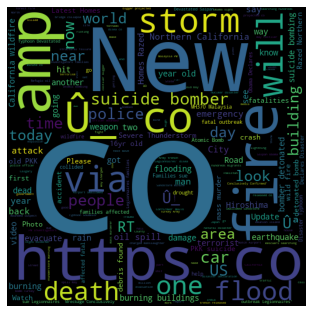

In [0]:
wordcloud(train[train['target'] == 1]['text'])

**Wodcloud of no-disaster tweets**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


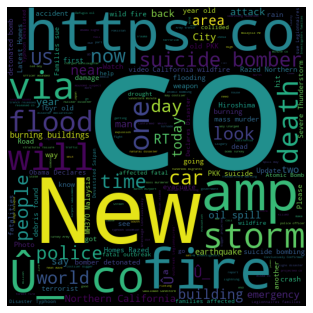

In [0]:
wordcloud(target_1[train['target'] == 1]['text'])

### 3.6.2 Frequency of words (ngrams)

**For real disasters**





This analysis allows to list the most recurring words in the text of the different tweet. We first list for real cases and then for cases that concern a disaster.
Here is a list of the words that are most present in a real case of disaster.

In [0]:
text_list=train[train['target']==1]['text']
word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

word_freq_dis = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

In [0]:
#Select + Display the words that the freqeunce is higer than n
n= 30
word_freq_dis = word_freq_dis[word_freq_dis['abs_freq']>n]
word_freq_dis

,abs_freq
the,1051
in,1037
of,888
a,730
to,706
...,...
Suicide,31
emergency,31
Legionnaires',31
detonated,31


In [0]:
#Select only words
word_freq_t1 = word_freq_dis.index.to_list()

**For not real disasters**

Here is a list of the words that are the most present in a case not concerning a disaster

In [0]:
text_list=train[train['target']==0]['text']
word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

word_freq_nodis = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

In [0]:
#Select + Display the words that the freqeunce is higer than n
n= 10
word_freq_nodis = word_freq_nodis[word_freq_nodis['abs_freq']>n]
word_freq_nodis

,abs_freq
the,1524
a,1115
to,1099
I,938
and,840
...,...
entire,11
bag,11
U,11
you.,11


In [0]:
#Select only words
word_freq_t0 = word_freq_nodis.index.to_list()

In order to obtain an efficient list of disasters, we have established two lists (one real disaster and one not). Then we subtracted the list of cases we were not interested in in order to have a final list.

In [0]:
#Remove the word that appears in both list & keep the real cases
lst_disaster = list(set(word_freq_t1) - set(word_freq_t0))


# 4. Data Cleaning

## 4.1 Working with abbreviations 
Commonly, informal language contains **`abbrevations`**. We considered relevant to substitute those abbreviations for the real meaning. The idea is to try not lose any hide information behind this abbreviations, especially when applying ngrams method.

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
from nltk.tokenize import word_tokenize
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
import nltk
nltk.download('punkt')
train["text"] = train["text"].apply(lambda x: convert_abbrev_in_text(x))
test["text"] = test["text"].apply(lambda x: convert_abbrev_in_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 4.2 Studying the 305 duplicates
From the beguining we realized that the dataset contained duplicates. Since they represent the 4% of the total entries, we decided to study them more deeply. Thanks to other another person's submission, we realized that between the duplicates there were ones that were wrongly classified. In other words, the same tweet just containing a different url (not relevant) were classified in both real and not real disasters.

We proceed to convert using an average for each duplicate class their corresponding targets.


In [0]:
# the code in the cell is taken from https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert
df_mislabeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
index_misl = df_mislabeled.index.tolist()

lenght = len(index_misl)

print(f"There are {lenght} equivalence classes with mislabelling")

There are 18 equivalence classes with mislabelling


In [0]:
train_nu_target = train[train['text'].isin(index_misl)].sort_values(by = 'text')

In [0]:
copy = train_nu_target.copy()
classes = copy.groupby('text').agg({'keyword':np.size, 'target':np.mean}).rename(columns={'keyword':'Number of records in train set', 'target':'Target mean'})

classes.sort_values('Number of records in train set', ascending=False).head(5)

,Number of records in train set,Target mean
text,,
He came to a land which was engulfed in tribal war and turned it into a land of peace that is . Madinah . # ProphetMuhammad # islam,6,0.333333
The Prophet ( peace be upon him ) said 'Save yourself from Hellfire even if it is by giving half a date in charity . ',6,0.333333
To fight bioterrorism sir .,4,0.500000
.POTUS # StrategicPatience is a strategy for # Genocide ; refugees ; IDP Internally displaced people ; horror ; and so on . https : //t.co/rqWuoy1fm4,4,0.750000
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,4,0.500000


In [0]:
majority_df = train_nu_target.groupby(['text'])['target'].mean()
#majority_df.index
def relabel(r, majority_index):
    ind = ''
    if r['text'] in majority_index:
        ind = r['text'] 
        return int(majority_df[ind] <= 0.5) # Return 0 if majority_df <= 0.5 else return 1
    else: 
        return r['target'] 

In [0]:
train['target'] = train.apply(lambda row: relabel(row, majority_df.index), axis = 1)

**Tweet comparison with disaster dataset**

In order to improve our tweet's prediction, we have chosen to compare word's tweets to a list of words about disasters. For this match, a column called `dis_matches` has been added. This column contains the sum of matches encountered. 

We did the same but with a list of the existing keywords, `train["keyword"].tolist()`. For this match, a column called `key_matches` has been added. This column contains the sum of matches encountered.

**Findings** both seems to be not relevant for the predictions in terms of accuracy

In [0]:
disaster_words = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/BigScale_Disaster_true_or_not/master/data/disaster_words.csv")
disaster_words = disaster_words["disaster word"].tolist() + lst_disaster
keywords = train["keyword"].tolist()
dis_matches = []
key_matches = []

for tweet in train['text']:
  i = 0
  j = 0
  words = tweet.lower().split()
  for word in words:
    if word in keywords:
      i += 1
    if word in disaster_words:
      j += 1
  key_matches.append(i)
  dis_matches.append(j)
train["keyword_matches"] = key_matches
train["dis_matches"] = dis_matches


## 4.3 Master data preprocessing function
Before computing the models we need to implement the function `master_data_preprocessing` which allows the user to tokenize the tweet removing the noise:

**Tokens removed:**
- urls
- html tags
- tokens not containing alphabet characters
- emojis (not used)
- tockens with equal or less than 2 characters
- stopwords
- punctuation


**Tokens modification:**
- stemming
- lemmatizing

**Arguments:**
- text: array containing the tweets.

In [0]:
def master_data_preprocessing(text):

    # Remove url
    text = text.apply(lambda x : re.sub(r"http\S{0,}", " ", x))

    # Remove the hastag "#" and keep the word
    text = text.apply(lambda x: " ".join(word.replace("#", " ") for word in x.split()))

    # Remove HTML tags
    text = text.apply(lambda x :re.compile(r'<.*?>').sub(r'',x))
    
    # Remove other characters
    text = text.apply(lambda x : re.sub("[^a-zA-Z]", " ",x))

    #Remove emojis
    '''text = text.apply(lambda x :re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE).sub(r'', x))'''

    # Remove tokens with less than 2 charcters
    text = text.apply(lambda x : re.sub(r'\b\w{0,2}\b', '', x))

    # Remove stopwords
    text = text.apply(lambda x: " ".join([word for word in x.lower().split() if word not in stopwords.words('english')]))

    # Remove punctuation method: (here we delete also "#")
    text = text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    # Stemming method
    text = text.apply(lambda x: " ".join([SnowballStemmer("english").stem(word) for word in x.split()]))

    # Lemmatizing method
    space_tokenizer = WhitespaceTokenizer()
    lemmatizer = WordNetLemmatizer()
    text = text.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in space_tokenizer.tokenize(x)]))
    
    return text

In [0]:
# Before starting the machine learning and after modyfing several features, now we imply our master_data_processing function
train["text_processed"] = master_data_preprocessing(train['text'])
test["text_processed"] = master_data_preprocessing(test['text'])

# 5. Machine Learning

In [0]:
# Converting the "Null" to "None". Necessary when keyword feature is used for predicting the targets
train['keyword'] = train['keyword'].fillna('None')
le = LabelEncoder()
encoded_keyword = pd.DataFrame(le.fit_transform(train["keyword"]), columns=["encoded_keyword"])
train = pd.concat((train, encoded_keyword), axis=1)

In [0]:
X = train['text_processed'] # the features we want to analyze
y = train['target'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

**Count Vectorizer:** The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.


In [0]:
# Converting the tokens using CountVectorizer
cv = CountVectorizer(analyzer = "word")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

**TfidfVectorizer:** Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

In [0]:
# Converting the tockens using the TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [0]:
# Accuracy function
"""
Function to compute accuracy based on classifier 
Parameters:
  Xtrain: feature for the train
  Xtest: feature for the text
  ytrain: target for the train
  ytext: target for the text
  classifier: set of machine learnig methods
""" 
def computeAccuracy(Xtrain,Xtest,ytrain,ytest,classifiers):
  accuracies=[]
  models=[]

  for classifier in classifiers:
    fit = classifier.fit(Xtrain, ytrain)
    pred = fit.predict(Xtest)
    accuracy = accuracy_score(pred, ytest)
    print('Accuracy of '+ classifier.__class__.__name__ + ' is ' + str(accuracy))


In [0]:
# Creating the classifiers
classifiers = [
    LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced'),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=100, class_weight = 'balanced'),
    RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' ),
    svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)]

In [0]:
# CV: Computing the accuracy for each classifier
computeAccuracy(X_train_cv, X_test_cv, y_train, y_test, classifiers)

Accuracy of LogisticRegression is 0.7925147734734077
Accuracy of KNeighborsClassifier is 0.6848325673013789
Accuracy of DecisionTreeClassifier is 0.7774130006565988
Accuracy of RandomForestClassifier is 0.8056467498358503
Accuracy of SVC is 0.804333552199606


In [0]:
# IDFTDF: Computing the accuracy for each classifier
computeAccuracy(X_train_tfidf, X_test_tfidf, y_train, y_test, classifiers)

Accuracy of LogisticRegression is 0.7925147734734077
Accuracy of KNeighborsClassifier is 0.7550886408404465
Accuracy of DecisionTreeClassifier is 0.7426132632961261
Accuracy of RandomForestClassifier is 0.7971109652002626
Accuracy of SVC is 0.8095863427445831


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/pytho

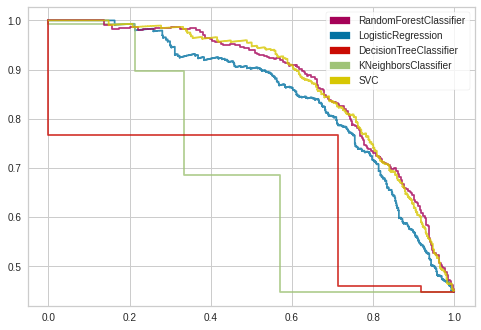

In [0]:
# Precision-Recall curve
for classifier in classifiers:  
  viz = PrecisionRecallCurve(classifier, fill_area=False, ap_score=False)
  viz.fit(X_train_cv, y_train)
  viz.score(X_test_cv, y_test)
  manual_legend(viz, ('RandomForestClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC'), ('m', 'b', 'r', 'g','y'), frameon=True, loc='upper right')

##Ensemble methods
Ensemble methods are techniques that combine predictions from different machine learning algorithms. The idea is to increase the accuracy of predictions compared to predictions using individual models. 

We used the following methods:  
- **Bootstrap Aggregating (BAGGing)** <br> 

First it creates random samples of the training data set with subsets of the training data set. Then for each sample it builds a model (one of the algorithms used before) and finally combines the different results of the models.

- **Extremely randomized trees** <br>

A random subset of candidate features is used and the thresholds are chosen randomly as well. The best of these randomly-generated thresholds is picked as the splitting rule. This usually allows toreduce the variance of the model even further, at the expense of a slightly greater increase in bias. 

- **Boosting (ex: AdaBoost)** <br>

It is a sequential technique where the first algorithm is trained on the entire data set. Then the following algorithms are built by fitting the residuals of the first algorithm. This means that we will give higher weight to the observations that were poorly predicted by the previous model.

- **Voting** <br>

It aggregates the predictions of each classifier and predicts the class that gets the most votes. For ‘hard’ voting a majority-vote is used for classification. For ‘soft’voting we can set weights to give more priorities to certain classifiers according to their performance.

In [0]:
#Base_estimators
bagg_classifiers = [
                BaggingClassifier(LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced'), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(KNeighborsClassifier(n_neighbors=3), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(DecisionTreeClassifier(max_depth=100, class_weight = 'balanced'), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' ), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(svm.SVC(kernel='rbf', C = 10.0, gamma=0.1), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
                ]

In [0]:
# with CV data
computeAccuracy(X_train_cv, X_test_cv, y_train, y_test,bagg_classifiers)

Accuracy of BaggingClassifier is 0.7839789888378201
Accuracy of BaggingClassifier is 0.6782665791201575
Accuracy of BaggingClassifier is 0.7747866053841103
Accuracy of BaggingClassifier is 0.799080761654629
Accuracy of BaggingClassifier is 0.8036769533814839


In [0]:
# with tfidf data
computeAccuracy(X_train_cv, X_test_cv, y_train, y_test,bagg_classifiers)

Accuracy of BaggingClassifier is 0.6776099803020355
Accuracy of BaggingClassifier is 0.6861457649376231
Accuracy of BaggingClassifier is 0.7793827971109653
Accuracy of BaggingClassifier is 0.799080761654629
Accuracy of BaggingClassifier is 0.7984241628365069


In [0]:
# Other ensemble classifiers
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

kfold = model_selection.KFold(n_splits=10, random_state=0)

ensemble_classif = [
                ExtraTreesClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0),
                AdaBoostClassifier(n_estimators=100, random_state=0),
                VotingClassifier(estimators)
                ]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
# Voting (hard)
voting_clf = VotingClassifier(estimators=[
                              ('logistic', LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced')),
                              ('Rforest', RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' )),
                              ('DTree', DecisionTreeClassifier(max_depth=100, class_weight = 'balanced')),
                              ('svm', svm.SVC(kernel='rbf', C = 10.0, gamma=0.1))
                              ], voting='hard')
voting_clf.fit(X_train_tfidf, y_train)
pred = voting_clf.predict(X_test_tfidf)
acc = accuracy_score(pred, y_test)
print("Accuracy is: " + str(acc))

Accuracy is: 0.8076165462902167


In [0]:
# with CV data
computeAccuracy(X_train_cv, X_test_cv, y_train, y_test,ensemble_classif)

Accuracy of ExtraTreesClassifier is 0.8017071569271176
Accuracy of AdaBoostClassifier is 0.7708470124753776
Accuracy of VotingClassifier is 0.8194353250164149


In [0]:
# with tfidf data
computeAccuracy(X_train_tfidf, X_test_tfidf, y_train, y_test,ensemble_classif)

Accuracy of ExtraTreesClassifier is 0.7852921864740644
Accuracy of AdaBoostClassifier is 0.7747866053841103
Accuracy of VotingClassifier is 0.8010505581089954


In [0]:
# Voting (soft)
voting_clf_soft = VotingClassifier(estimators=[
                              ('logistic', LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced')),
                              ('Rforest', RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' )),
                              ('DTree', DecisionTreeClassifier(max_depth=100, class_weight = 'balanced')),
                              ('svm', svm.SVC(kernel='rbf', C = 10.0, gamma=0.1, probability=True))
                              ], voting='soft', weights=[1,2,1,2], flatten_transform=True)
fit = voting_clf_soft.fit(X_train_tfidf, y_train)
preds = voting_clf_soft.predict(X_test_tfidf)
acc = accuracy_score(preds, y_test)
print("Accuracy is: " + str(acc))

Accuracy is: 0.8082731451083388


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


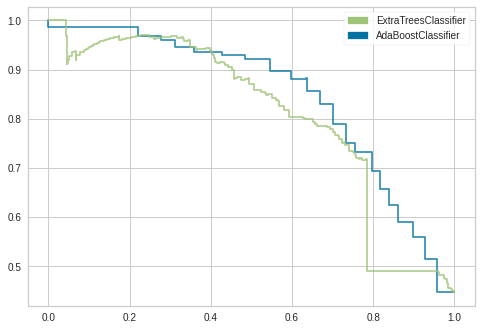

In [0]:
for classifier in ensemble_classif[0:2]:  
  visua = PrecisionRecallCurve(classifier, fill_area=False, ap_score=False)
  visua.fit(X_train_cv, y_train)
  visua.score(X_test_cv, y_test)
  manual_legend(visua, ('ExtraTreesClassifier', 'AdaBoostClassifier'), ('g', 'b'), frameon=True, loc='upper right')

## **Neural network**
This part is commented because the runtime lasts more than 2h but the accuracy is not better than, for instance, the voting method.

In [0]:
'''# KERAS PAU:
from keras.models import Sequential
from keras import layers

input_dim = X_train_cv.shape[1]  # Number of features

model = Sequential()

model.add(layers.Dense(600, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(200))
model.add(layers.Dense(150))
model.add(layers.Dense(10))
model.add(layers.Dense(1, activation='sigmoid'))'''

"# KERAS PAU:\nfrom keras.models import Sequential\nfrom keras import layers\n\ninput_dim = X_train_cv.shape[1]  # Number of features\n\nmodel = Sequential()\n\nmodel.add(layers.Dense(600, input_dim=input_dim, activation='relu'))\nmodel.add(layers.Dense(200))\nmodel.add(layers.Dense(150))\nmodel.add(layers.Dense(10))\nmodel.add(layers.Dense(1, activation='sigmoid'))"

In [0]:
'''# KERAS PAU:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()'''

"# KERAS PAU:\nmodel.compile(loss='binary_crossentropy', \n              optimizer='adam', \n              metrics=['accuracy'])\nmodel.summary()"

In [0]:
'''# KERAS PAU:
history = model.fit(X_train_cv, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test_cv, y_test),
                    batch_size=10)'''

'# KERAS PAU:\nhistory = model.fit(X_train_cv, y_train,\n                    epochs=100,\n                    verbose=False,\n                    validation_data=(X_test_cv, y_test),\n                    batch_size=10)'

In [0]:
'''# KERAS PAU:
loss, accuracy = model.evaluate(X_train_cv, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_cv, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))'''

'# KERAS PAU:\nloss, accuracy = model.evaluate(X_train_cv, y_train, verbose=False)\nprint("Training Accuracy: {:.4f}".format(accuracy))\nloss, accuracy = model.evaluate(X_test_cv, y_test, verbose=False)\nprint("Testing Accuracy:  {:.4f}".format(accuracy))'

In [0]:
'''from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

NN = Sequential()
NN.add(Dense(512, input_shape=(X_train.shape[1],)))
NN.add(Activation("relu"))
NN.add(Dropout(0.2))
NN.add(Dense(2))
NN.add(Activation("softmax"))

optimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
NN.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

NN.summary()'''

'from keras import optimizers\nfrom keras.utils import np_utils\nfrom keras.models import Sequential\nfrom keras.layers.core import Dense, Dropout, Activation\n\nY_train = np_utils.to_categorical(y_train, 2)\nY_test = np_utils.to_categorical(y_test, 2)\n\nNN = Sequential()\nNN.add(Dense(512, input_shape=(X_train.shape[1],)))\nNN.add(Activation("relu"))\nNN.add(Dropout(0.2))\nNN.add(Dense(2))\nNN.add(Activation("softmax"))\n\noptimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)\nNN.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])\n\nNN.summary()'

## Predictions for Kaggle

We used the following fields for submissions on Kaggle.

In [0]:
X = test['text_processed'] # the features we want to analyze

In [0]:
# Converting the tokens using CountVectorizer
X_cv = cv.transform(X)

In [0]:
# Converting the tokens using the tfdfvectorizer
X_tfidf = tfidf.transform(X)

In [0]:
# CV: Computing the accuracy for each classifier
# Each submission we specify the classifier we need before fitting
voting_clf = VotingClassifier(estimators=[
                              ('logistic', LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced')),
                              ('Rforest', RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' )),
                              ('DTree', DecisionTreeClassifier(max_depth=100, class_weight = 'balanced')),
                              ('svm', svm.SVC(kernel='rbf', C = 10.0, gamma=0.1, probability = True))
                              ], voting='soft', weights=[1,2,1,2], flatten_transform=True)
fit = voting_clf.fit(X_train_cv, y_train)
test["target"] = fit.predict(X_cv)

In [0]:
test[["id", "target"]].to_csv("UNIL_GOOGLE.csv", index=False)

In [0]:
print(test[["id", "target"]])

         id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       0

[3263 rows x 2 columns]


In [0]:
from google.colab import files
files.download("UNIL_GOOGLE.csv")

## Word embedding

A word embedding is a learned representation for a text where words that have the same meaning have a similar representation. It is this approach to the representation of words and documents that can be considered one of the major advances in the in-depth learning of the difficult problems of natural language processing.


**Findings:** this model did not give us any interesting results that we did not exploit very much

In [0]:
#Install requirement
!pip install gensim

In [0]:
X_we = train['text_processed'].values
y_we = train['target'].values
X_we_t = train['text_processed'].values
y_we_t = train['target'].values

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
total_reviews = X_we + X_we_t
tokenizer_obj.fit_on_texts(total_reviews)

#pad sequence
max_length= max([len(s.split()) for s in total_reviews])

# voc size
vocab_size = len(tokenizer_obj.word_index) +1

X_we_tok = tokenizer_obj.texts_to_sequences(X_we)
X_we_t_tok = tokenizer_obj.texts_to_sequences(X_we_t)

X_we_pad = pad_sequences(X_we_tok, maxlen=max_length, padding='post')
X_we_t_pad = pad_sequences(X_we_t_tok, maxlen=max_length, padding='post')

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM,GRU
from keras.layers.embeddings import Embedding
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

#try 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(X_we_pad,y_we, batch_size=128, epochs=25, validation_data=(X_we_t_pad,y_we_t), verbose=2)

##Our Predictions on Kaggle

Please find here a summary of all our submissions on Kaggle. We did not submit everything we have done our notebook, as not every change (for example new algorithm or more data cleaning) improved our prediction. 

![alt text](https://github.com/SarahBuechner/BigScale_Disaster_true_or_not/blob/master/images/Table_predictions.png?raw=true)

As you can see in the table above for nearly all our submissions we cleaned our data using Stemming, Lemmatization, Punctuation and Stopword removal. Then we added some other data cleaning methods. For example we removed emojis, special characters and we reclassified the wrongly classified wrong targets. We used Count and TF-IDF Vectorizer. Our best results were generally with the former. 

![alt text](https://github.com/SarahBuechner/BigScale_Disaster_true_or_not/blob/master/images/Graph_predictions.png?raw=true)

Our best estimations were with the ensemble classifier Voting. In fact with the 'soft' Voting we were able to obtain an accuracy of 0.807 and with 'hard' voting an accuracy of 0.808. 